In [ ]:
# import necesssary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, make_scorer

## The main error function (Mean Adjusted Power Error)
$Mean Adjusted Power Error = \frac{1}{N}\sum_{i=1}^n|\hat{y}_i-y_i|^{exp}$

$exp = 2 - tanh(\frac{y_i-a}{b})\times(\frac{\hat{y}_i-y_i}{c})$

$a: center, b:critical range, c:slope$



In [ ]:
def mean_adjusted_power_error(y_true, y_pred, center=125, critical_range=55, slope=100, verbose=False):
    def exponent(y_hat: float, y_i: float, a=center, b=critical_range, c=slope) -> float:
        return 2-np.tanh(((y_i-a)/b))*((y_hat-y_i)/c)
    sum_=0
    for i in range(len(y_true)):
        exp = exponent(y_pred[i], y_true[i])
        if verbose:
            print(exp)
        sum_ += abs((y_pred[i]-y_true[i]))**exp
    return sum_/len(y_true)



In [ ]:
mean_adjusted_power_error([50], [40], verbose=True)

1.9122766214806983


81.71026546852883

In [ ]:
mean_adjusted_power_error([50], [60], verbose=True)

2.0877233785193017


122.3836435074557

In [ ]:
y_true = [60., 120., 340.]
y_pred = [80., 130., 350.]

In [ ]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

14.142135623730951

In [ ]:
np.seterr('raise')
mape = mean_adjusted_power_error(y_true, y_pred)
mape

279.4945162619791

In [ ]:
rmape = np.sqrt(mape)
rmape

16.718089491983797

In [ ]:
error  = make_scorer(mean_adjusted_power_error, greater_is_better=False)


In [ ]:
def show_per_true_value(value,value_range):
    prediction = np.arange(value - value_range,value + value_range)
    errors=[]
    mse=[]
    for pred in prediction:
        errors.append(mean_adjusted_power_error([value], [pred]))
        mse.append(mean_squared_error([value], [pred]))
    plt.plot(prediction, errors, label='mape')
    plt.plot(prediction, mse, label='mse', ls='dotted')
    plt.axvline(value, label='True Value', color='k', ls='--')
    plt.xlabel('Predicted Value')
    plt.ylabel('Error')
    plt.title('{} +- {}'.format(value, value_range))
    plt.legend()
    plt.show()

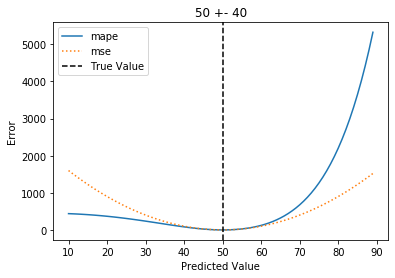

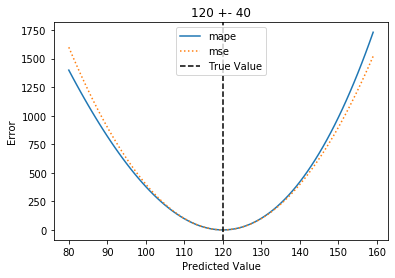

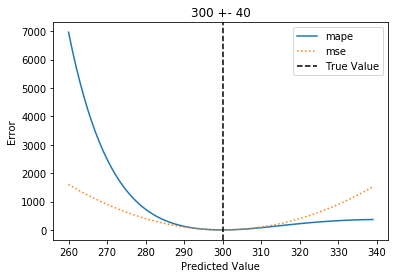

In [ ]:
show_per_true_value(50, 40)
show_per_true_value(120, 40)
show_per_true_value(300, 40)


In [ ]:
from cega import clarke_error_grid

In [ ]:
y_true = [50, 60, 100, 135, 150, 200, 250, 300]
y_pred1 = [25, 45, 150, 160, 200, 300, 350, 390]
y_pred2 = [75, 75, 50, 110, 100, 100, 150, 210]
results = {}
results['example_1'] = {} 
results['example_2'] = {} 



[3, 5, 0, 0, 0]


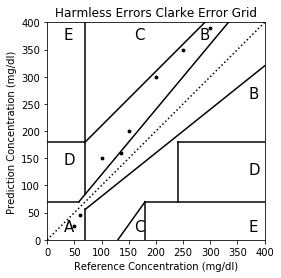

In [ ]:
zones = clarke_error_grid(y_true,y_pred1, "Harmless Errors")[1]
print(zones)
results['example_1']['A'] = zones[0]
results['example_1']['B'] = zones[1]
results['example_1']['C'] = zones[2]
results['example_1']['D'] = zones[3]
results['example_1']['E'] = zones[4]
mse = mean_squared_error(y_true, y_pred1)
results['example_1']['MSE'] = round(mse, 2)
results['example_1']['RMSE'] = round(np.sqrt(mse), 2)
mape = mean_adjusted_power_error(y_true, y_pred1)
results['example_1']['MAPE'] = round(mape, 2)
results['example_1']['RMAPE'] = round(np.sqrt(mape), 2)
plt.show();

[1, 4, 0, 3, 0]


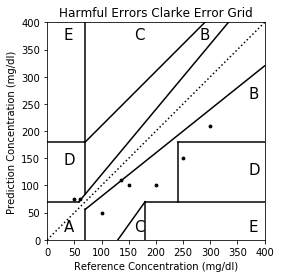

{'example_1': {'A': 3,
  'B': 5,
  'C': 0,
  'D': 0,
  'E': 0,
  'MSE': 4321.88,
  'RMSE': 65.74,
  'MAPE': 1034.32,
  'RMAPE': 32.16},
 'example_2': {'A': 1,
  'B': 4,
  'C': 0,
  'D': 3,
  'E': 0,
  'MSE': 4321.88,
  'RMSE': 65.74,
  'MAPE': 242936.41,
  'RMAPE': 492.89}}

In [ ]:
zones = clarke_error_grid(y_true,y_pred2, "Harmful Errors")[1]
print(zones)
results['example_2']['A'] = zones[0]
results['example_2']['B'] = zones[1]
results['example_2']['C'] = zones[2]
results['example_2']['D'] = zones[3]
results['example_2']['E'] = zones[4]
mse = mean_squared_error(y_true, y_pred2)
results['example_2']['MSE'] = round(mse, 2)
results['example_2']['RMSE'] = round(np.sqrt(mse), 2)
mape = mean_adjusted_power_error(y_true, y_pred2)
results['example_2']['MAPE'] = round(mape, 2)
results['example_2']['RMAPE'] = round(np.sqrt(mape), 2)
plt.show();

In [ ]:
import pprint
pprint.pprint(results)

{'example_1': {'A': 3,
               'B': 5,
               'C': 0,
               'D': 0,
               'E': 0,
               'MAPE': 1034.32,
               'MSE': 4321.88,
               'RMAPE': 32.16,
               'RMSE': 65.74},
 'example_2': {'A': 1,
               'B': 4,
               'C': 0,
               'D': 3,
               'E': 0,
               'MAPE': 242936.41,
               'MSE': 4321.88,
               'RMAPE': 492.89,
               'RMSE': 65.74}}


In [ ]:
example_df = pd.DataFrame.from_dict(results, orient='index')
example_df

,A,B,C,D,E,MSE,RMSE,MAPE,RMAPE
example_1,3,5,0,0,0,4321.88,65.74,1034.32,32.16
example_2,1,4,0,3,0,4321.88,65.74,242936.41,492.89


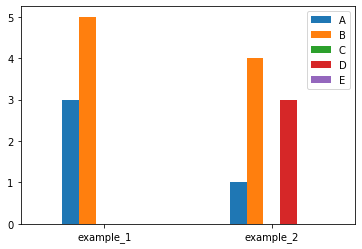

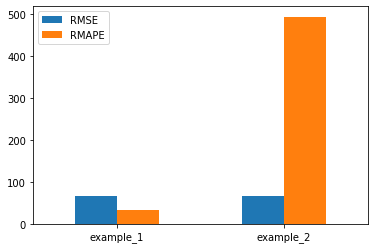

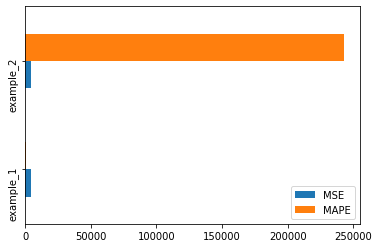

In [ ]:
example_df[['A', 'B', 'C', 'D', 'E']].plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
example_df[['RMSE', 'RMAPE']].plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
example_df[['MSE', 'MAPE']].plot(kind='barh')
plt.xticks(rotation=0)
plt.yticks(rotation=90)
plt.show()